In [20]:
import pandas as pd

# Cargar solo una hoja del Excel
df = pd.read_excel("general.xlsx", sheet_name="female_last_10_years")

df.head()

,TIME,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,AVG
0,Belgium,75.675,75.350,75.775,77.500,78.800,78.875,78.650,79.000,79.000,76.850,77.5475
1,Bulgaria,79.025,79.675,82.625,83.775,85.775,82.775,82.025,84.000,84.725,85.300,82.9700
2,Czechia,89.500,90.275,90.500,91.575,91.825,91.750,91.675,91.925,93.150,92.550,91.4725
3,Denmark,81.050,83.100,82.825,83.950,83.275,84.325,84.725,85.375,84.975,84.075,83.7675
4,Germany,82.675,84.375,84.500,84.450,84.800,83.980,83.125,83.875,84.625,84.750,84.1155


# previsión empleabilidad mujeres en 2015 en base a la tendencia de los ultimos 10 años

In [21]:
# elimino columna AVG

df=df.drop(columns=["AVG"])

In [7]:
df.dtypes

,0
TIME,object
2015,float64
2016,float64
2017,float64
2018,float64
2019,float64
2020,float64
2021,float64
2022,float64
2023,float64


In [22]:
# añado columna para la predicción
predictions_2025 = []

In [23]:
# Me aseguro de que el índice no es 'TIME' para hacer la regresión
df = df.set_index('TIME')

# Convierto los años a un formato adecuado para la regresión
years = list(range(2015, 2025))  # Años de 2015 a 2024

In [12]:
# Bucle para predecir el valor de 2025 para cada país
for country in df.index:
    #Quiero obtener la serie de tasas de empleo para este país
    y = df.loc[country].values  # Empleabilidad del país en los años de 2015 a 2024

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Ajusto el modelo

X = np.array(years).reshape(-1, 1)  # Los años como variable independiente
model = LinearRegression()
model.fit(X, y)  # Ajusto el modelo con los datos de este país

LinearRegression()

In [15]:
# Predecir la tasa de empleabilidad para 2025
y_pred_2025 = model.predict(np.array([[2025]]))  # Predicción para 2025

# Almacenar la predicción en la lista
predictions_2025.append(y_pred_2025[0])

In [17]:
# Agregar la columna de predicciones para 2025 al DataFrame
df['Pred_2025'] = predictions_2025

# Ver el DataFrame actualizado
print(df.head())

ValueError: Length of values (1) does not match length of index (30)

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np



# Lista para almacenar las predicciones para 2025
predictions_2025 = []

# Aplicamos la regresión lineal para cada país
for country in df.index:
    # Obtener las tasas de empleo para este país
    y = df.loc[country].values  # Empleabilidad de este país de 2015 a 2024

    # Ajuste del modelo de regresión
    X = np.array(years).reshape(-1, 1)  # Los años como variable independiente
    model = LinearRegression()
    model.fit(X, y)  # Ajustamos el modelo

    # Predicción para el año 2025
    pred_2025 = model.predict(np.array([[2025]]))  # Predicción para 2025
    predictions_2025.append(pred_2025[0])  # Agregar la predicción

# Añadir la columna de predicciones al DataFrame
df['Pred_2025'] = predictions_2025

# Ver el DataFrame actualizado
print(df.head())

            2015    2016    2017    2018    2019    2020    2021    2022  \
TIME                                                                       
Belgium   75.675  75.350  75.775  77.500  78.800  78.875  78.650  79.000   
Bulgaria  79.025  79.675  82.625  83.775  85.775  82.775  82.025  84.000   
Czechia   89.500  90.275  90.500  91.575  91.825  91.750  91.675  91.925   
Denmark   81.050  83.100  82.825  83.950  83.275  84.325  84.725  85.375   
Germany   82.675  84.375  84.500  84.450  84.800  83.980  83.125  83.875   

            2023    2024  Pred_2025  
TIME                                 
Belgium   79.000  76.850  79.406667  
Bulgaria  84.725  85.300  85.985000  
Czechia   93.150  92.550  93.303333  
Denmark   84.975  84.075  85.650000  
Germany   84.625  84.750  84.532333  


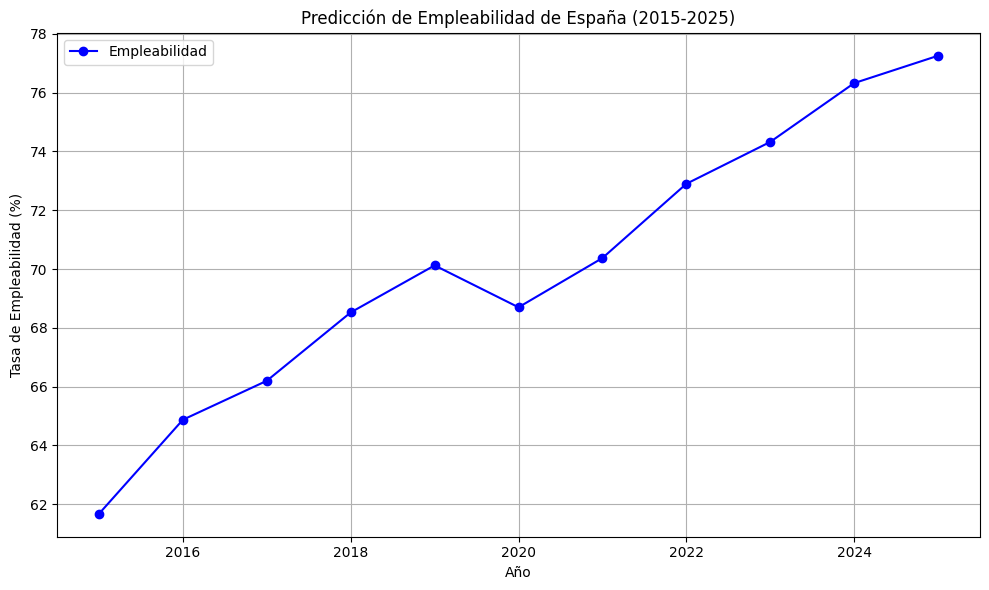

In [26]:
# Quiero hacer un grafico para España

import matplotlib.pyplot as plt

# Filtrar solo los datos de España (asegurándote de que el nombre del país esté bien escrito)
spain_data = df.loc['Spain']

# Crear los datos para graficar (años de 2015 a 2025)
years = list(range(2015, 2026))  # De 2015 a 2025
values = spain_data.values.tolist()  # Los valores de empleabilidad de España

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los datos de España
plt.plot(years, values, marker='o', linestyle='-', color='b', label='Empleabilidad')

# Añadir título y etiquetas
plt.title('Predicción de Empleabilidad de España (2015-2025)')
plt.xlabel('Año')
plt.ylabel('Tasa de Empleabilidad (%)')

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

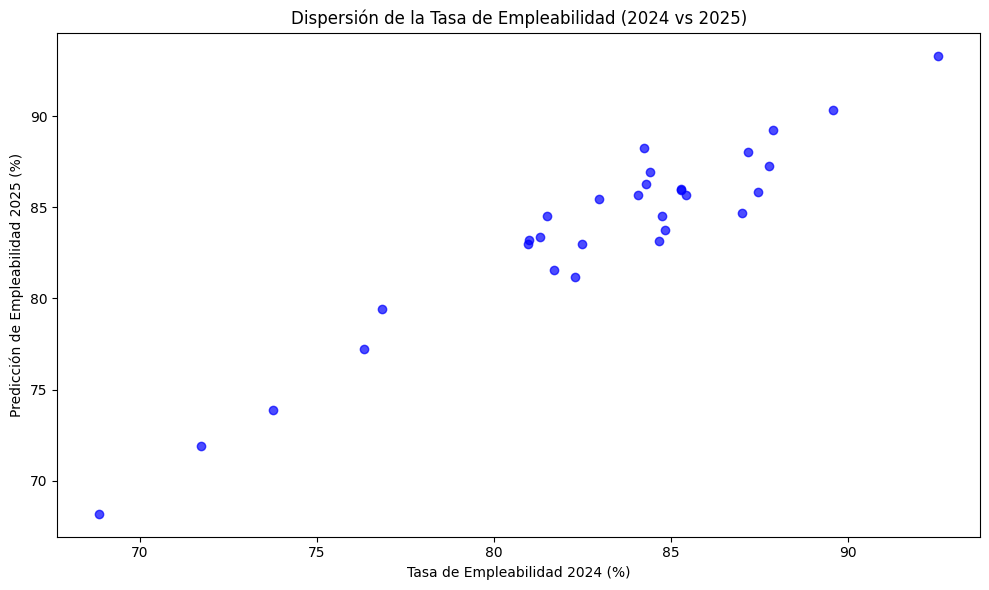

In [27]:
# grafico de dispersión

# Gráfico de dispersión entre 2024 y la predicción de 2025
plt.figure(figsize=(10, 6))
plt.scatter(df[2024], df['Pred_2025'], color='blue', alpha=0.7)

# Añadir título y etiquetas
plt.title('Dispersión de la Tasa de Empleabilidad (2024 vs 2025)')
plt.xlabel('Tasa de Empleabilidad 2024 (%)')
plt.ylabel('Predicción de Empleabilidad 2025 (%)')

# Mostrar gráfico
plt.tight_layout()
plt.show()